In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json 


In [2]:
url = f'https://flood-api.open-meteo.com/v1/flood?latitude=16.029421&longitude=108.234653&daily=river_discharge,river_discharge_mean'
response = requests.get(url)
data = json.loads(response.text)

In [3]:
df = pd.json_normalize(data)

# Use pandas methods to transform the dataframe

df = df.apply(pd.Series.explode)
df = df.reset_index(drop = True)
df.head()
df.to_csv("temp")

In [4]:
df.columns = df.columns.str.replace('daily.', 'data-')
df.columns = df.columns.str.replace('daily_units.', 'unit-')
df.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,unit-time,unit-river_discharge,unit-river_discharge_mean,data-time,data-river_discharge,data-river_discharge_mean
0,16.050003,108.25,3.098011,0,GMT,GMT,iso8601,m³/s,m³/s,2023-10-13,1.15,17.64
1,16.050003,108.25,3.098011,0,GMT,GMT,iso8601,m³/s,m³/s,2023-10-14,0.91,15.49
2,16.050003,108.25,3.098011,0,GMT,GMT,iso8601,m³/s,m³/s,2023-10-15,0.81,13.75
3,16.050003,108.25,3.098011,0,GMT,GMT,iso8601,m³/s,m³/s,2023-10-16,0.7,13.6
4,16.050003,108.25,3.098011,0,GMT,GMT,iso8601,m³/s,m³/s,2023-10-17,0.62,18.47


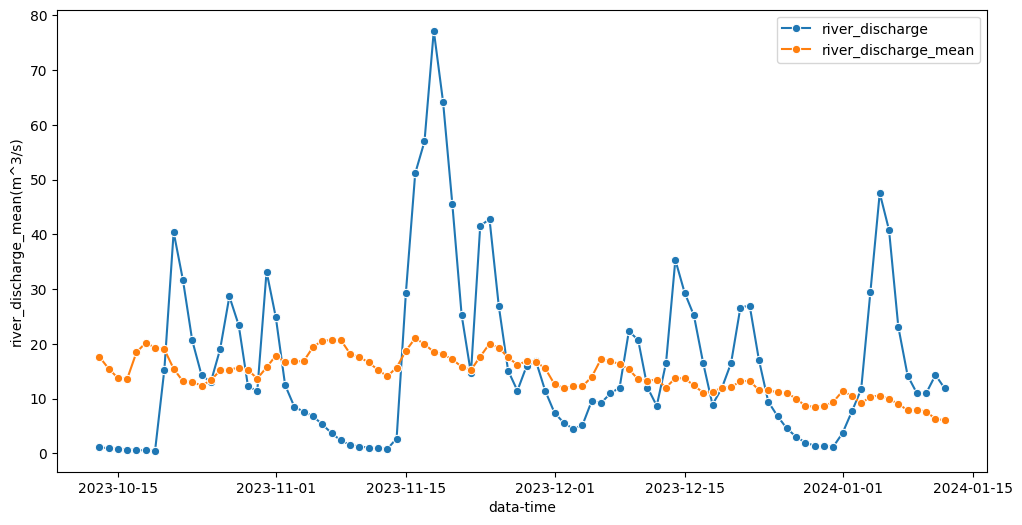

In [5]:
df['data-time'] = pd.to_datetime(df['data-time'], utc=None)

# Assuming your CSV file has columns like 'Time', 'Temperature', and 'Rainfall'
# You can use the following code to create a line plot with dual y-axes

plt.figure(figsize=(12, 6))

# Plot Temperature on the left y-axis
sns.lineplot(x='data-time', y='data-river_discharge', data=df, label='river_discharge', marker='o')
plt.ylabel('river_discharge(m^3/s)')

sns.lineplot(x='data-time', y='data-river_discharge_mean', data=df, label='river_discharge_mean', marker='o')
plt.ylabel('river_discharge_mean(m^3/s)')

plt.show()